# Effects of different preprocessing techniques on cataract dataset

#### Bekir Semih Tekeli
#### Ayşe Şule Bakal

Abstract of the project comes here.

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

Describe the problem here. What are the questions you are trying to solve?

## Data Understanding<a class="anchor" id="data_understanding"></a>

<h1><span class="label label-primary">Eye Diseases:</span></h1>
<div class="card text-white bg-info mb-3" style="max-width: 60rem;">
  <div class="card-body">

There are many eye diseases. Every anatomical part of this organ can present a disorder and cause an eye disorder. It is important for the patient to fully understand the nature of his ocular disorder in order to take good care of his visual condition. It also makes it possible to better manage a disease and detect signs indicating deterioration. An informed and savvy patient is more likely to be treated on time, to feel confident and to adhere to their treatment..
  </div>
</div>

<div class="card text-white bg-primary" style="max-width: 60rem;">
  <div class="card-body">
    <p class="card-text">
In this dataset, annotations were added by human readers trained in quality control management. They classify patients into four categories, including:

</p>
  </div>

 <ul style="list-style-type:circle;">
  <li>Normal       (N)</li>
  <li>Cataract     (C)</li>
  <li>Glaucoma     (G)</li>
  <li>Diabetes     (D)</li>
</ul>
</div>


# Retina

The retina is a delicate, multilayered light-sensitive membrane lining the inside wall at the back of the eye. It is connected by the optic nerve to the brain. The macula, at the center of the retina, creates our ability to see detail. The central pit in the macula that produces the sharpest vision is the fovea. Surrounding the macula is the peripheral retina, which enables our peripheral vision. Attached to the retina, the vitreous is a gel-like substance that fills the eyeball between the lens and the retina.


# Normal (N)

![](https://www.rcseattle.com/wp-content/uploads/2016/05/resources-normal-1.png)

# Cataract (C)
A cataract is a clouding of the natural lens of the eye, called the lens. The latter is located inside the eye, behind the iris, which represents the colored part forming the pupil. The diagram of the anatomy of the eye shows it well. Several factors, including age, heredity, medication and environment, contribute to the formation of cataracts. Over time, the lens becomes frosty, yellowish and hazy. The light passing through this lens is therefore altered and diminished by the cataract. Cataract extraction is an intraocular surgical procedure that can permanently treat this condition.

![](https://www.nvisioncenters.com/wp-content/uploads/cataract-eye-vs-normal-eye-960x639.jpg)

# Glaucoma (G)
Glaucoma is an eye disease that irreversibly and permanently affects the optic nerve (structural damage). The optic nerve is the part of the eye through which passes all the visual information captured by the eye. This information travels through the optic nerve and is transmitted to the brain.

Glaucoma is a very common disease that affects people of all ages. According to sources, it is estimated that up to 10% of the population would be affected. Globally, this represents 65 million people.

![](https://www.wolfeeyeclinic.com/filesimages/Glaucoma/GlaucomaEyeDiagram-min.jpg)

# Diabetes (D)
Diabetes is a very serious disease that can cause problems like blindness, heart disease, kidney failure and amputations. By taking good care of your health through healthy eating, regular exercise and taking your medications, you can control diabetes. Diabetes can also affect the eye, this is called diabetic retinopathy.

All people with diabetes should have an eye exam using a photo-screening device or an eye exam with pupil dilation annually. As soon as the disease (diabetic retinopathy) is visible in the eye, an examination with pupil dilation should be performed for follow-up at variable frequency.

In some people with diabetic retinopathy, the blood vessels in the retina may swell and leak, while in others, new abnormal blood vessels may form on the surface of the retina. These changes can lead to vision loss or even blindness.

![](https://myvision.org/wp-content/uploads/2022/02/diabetic-retinopathy-diagram-664x321.jpg)


## Data Preparation<a class="anchor" id="data_preparation"></a>

In [39]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
tf.get_logger().setLevel('INFO')
import cv2
import os
import pandas as pd

In [40]:
DATASET_PATH = r"./dataset/"
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256
EPOCHS = 30
BATCH_SIZE = 32
SEED = 42
dataset_folders = []    # to keep main folder names
total = 0
print(f"There are {len(os.listdir(DATASET_PATH))} folder in dataset.")
for path in sorted(os.listdir(DATASET_PATH)):
    print(f"\t-There are {len(os.listdir(DATASET_PATH + path))} images in {path} folder.")
    total += len(os.listdir(DATASET_PATH + path))   # add element size of the current folder to total variable
    dataset_folders.append( DATASET_PATH + path  )  # add current folder path to dataset_folders

# Create an empty dataframe
df = pd.DataFrame(0,
                  columns=['paths',
                           'class-label'],
                  index=range(total))
# store each image path in the dataframe
# class labels -> 0:Normal 1:Cataract 2:Glaucoma 3:RetinaDisease
i = 0
for p, path in enumerate(dataset_folders):      # main folders
    for sub_path in sorted(os.listdir(path)):   #images
        df.iloc[i, 0] = path + "/" + sub_path
        df.iloc[i, 1] = p
        i += 1
# Display some examples for the created DataFrame
print(df.sample(frac=1, random_state=SEED).head(10))

There are 4 folder in dataset.
	-There are 300 images in 1_normal folder.
	-There are 100 images in 2_cataract folder.
	-There are 101 images in 2_glaucoma folder.
	-There are 100 images in 3_retina_disease folder.
                                         paths  class-label
110              ./dataset/1_normal/NL_111.png            0
419      ./dataset/2_glaucoma/Glaucoma_020.png            2
565  ./dataset/3_retina_disease/Retina_065.png            3
77               ./dataset/1_normal/NL_078.png            0
181              ./dataset/1_normal/NL_182.png            0
284              ./dataset/1_normal/NL_285.png            0
10               ./dataset/1_normal/NL_011.png            0
469      ./dataset/2_glaucoma/Glaucoma_070.png            2
78               ./dataset/1_normal/NL_079.png            0
349      ./dataset/2_cataract/cataract_050.png            1


In [45]:
example_paths=["./dataset/1_normal/NL_001.png","./dataset/2_cataract/cataract_001.png","./dataset/2_glaucoma/Glaucoma_001.png","./dataset/3_retina_disease/Retina_001.png"]
images_array1=[]
images_array2=[]
def display_examples(images_array1,images_array2,row1,row2):
    fig = plt.figure(figsize=(15, 9))
    plt.title(f"First row->{row1} Images    Second row->{row2} Images")
    plt.axis('off')
    plt.grid(False)
    for i in range(4):
        current_path=example_paths[i]

        fig.add_subplot(2, 4, i + 1)
        plt.axis('off')
        plt.title(current_path.split("/")[3])
        plt.imshow(images_array1[i])

        fig.add_subplot(2, 4, i + 5)
        plt.axis('off')
        plt.title(current_path.split("/")[3])
        plt.imshow(images_array2[i])

## Initial preprocess
Our first preprocess is apllied also for all other preprocesses that we used.

In this preprocess, we delete unnecessary black areas from the images. Also we resize the images to 256x256 due to huge dimensions.

In [46]:
#Cropping image to avoid from unnecessary black areas
def deleteBlackAreas(filename):
    image_size = (IMAGE_WIDTH, IMAGE_HEIGHT)
    img = cv2.imread(filename)  #read image from file
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
    _, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)  # turn it into a binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # find contours
    if len(contours) != 0:
        #find the biggest area
        cnt = max(contours, key=cv2.contourArea)

        #find the bounding rect
        x, y, w, h = cv2.boundingRect(cnt)

        crop = img[y:y + h, x:x + w]  # crop image
        crop1 = cv2.cvtColor(cv2.resize(crop, image_size, interpolation=cv2.INTER_AREA),
                             cv2.COLOR_BGR2RGB)  # resize to image_size and change color space from BGR to RGB for matplotlib
        return crop1
    else:
        return cv2.resize(img, image_size, interpolation=cv2.INTER_AREA)

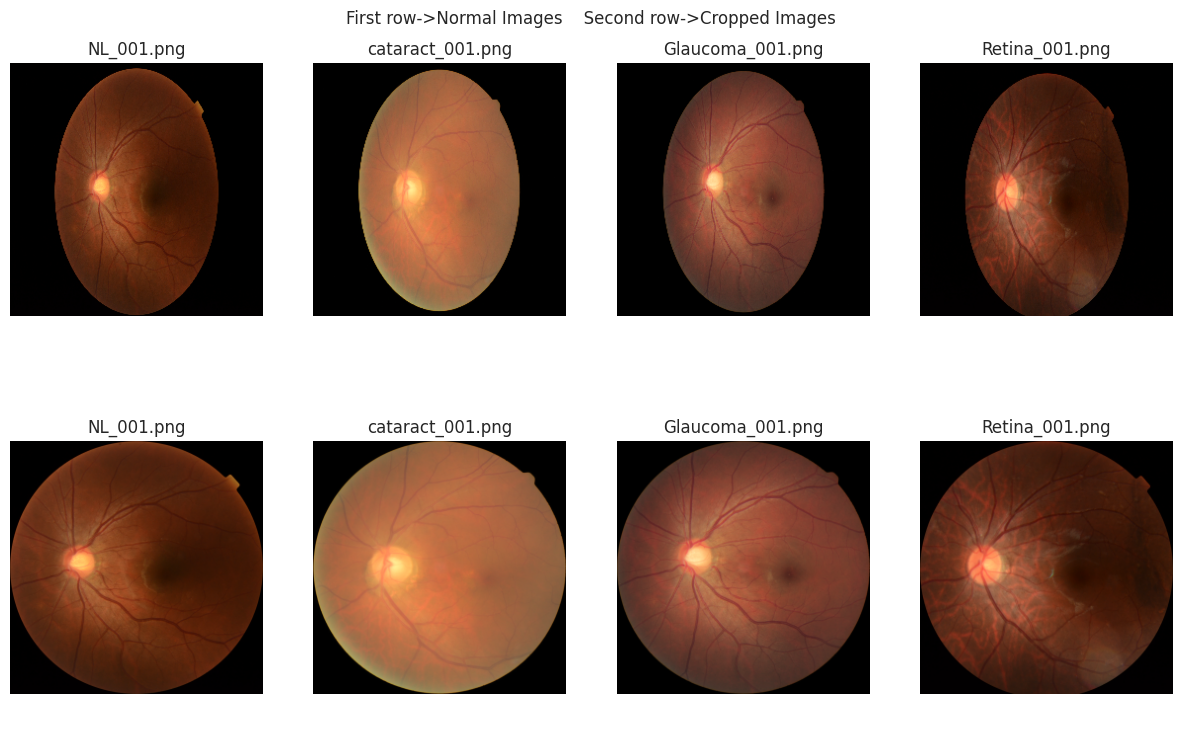

In [47]:
for i in range(4):
    img=cv2.resize(cv2.cvtColor(cv2.imread(example_paths[i]),cv2.COLOR_BGR2RGB),(IMAGE_WIDTH,IMAGE_HEIGHT))
    images_array1.append(img)
    img2=deleteBlackAreas(example_paths[i])
    images_array2.append(img2)
display_examples(images_array1,images_array2,"Normal","Cropped")
images_array1.clear()
images_array2.clear()

## 1.Normalization of histogram of images
In this preprocess, we normalize all three (R-G-B) channels

In [49]:
#normalizes the histogram of images
def normalize_histograms(img):
    image_copy = img.copy()
    for i in range(3):
        imi = img[:, :, i]
        minval = np.min(imi)
        maxval = np.max(imi)
        imrange = maxval - minval
        # imi-minval will turn the color range between 0-imrange, and the scaling will stretch the range between 0-255
        image_copy[:, :, i] = (255 / (imrange + 0.0001) * (imi - minval))
    return image_copy

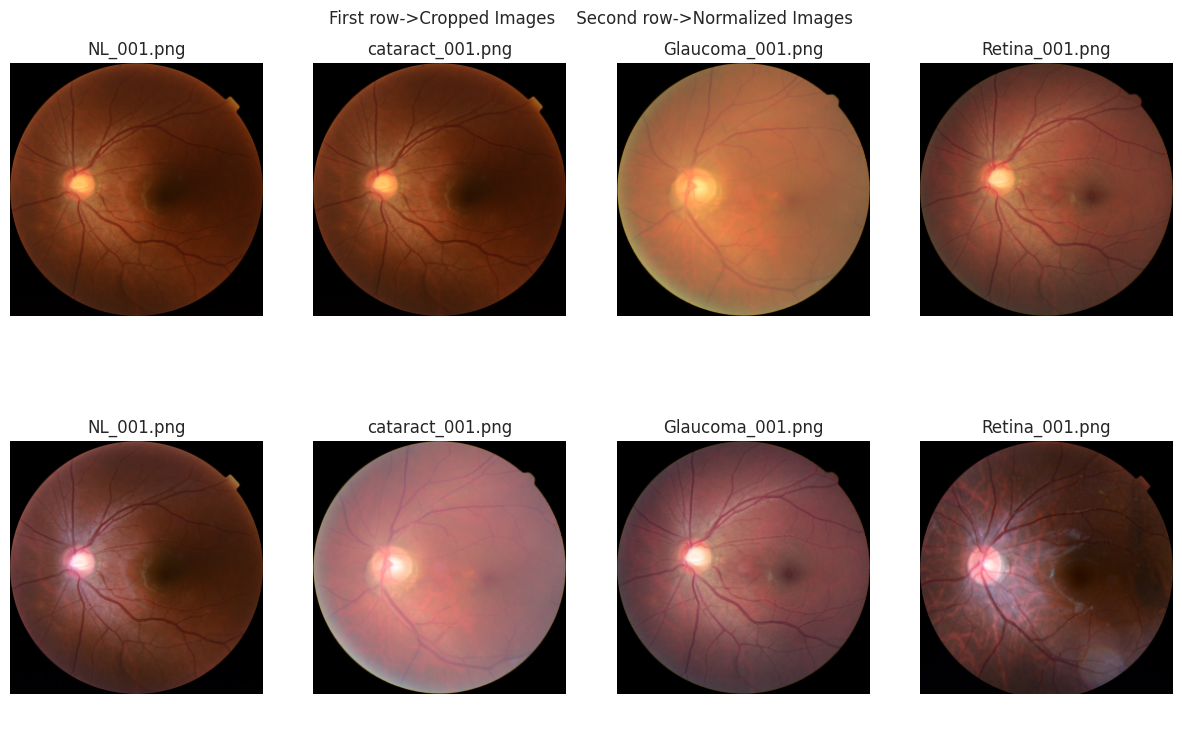

In [50]:
for i in range(4):
    img=deleteBlackAreas(example_paths[i])
    images_array1.append(img)
    img2=normalize_histograms(img)
    images_array2.append(img2)
display_examples(images_array1,images_array2,"Cropped","Normalized")
images_array1.clear()
images_array2.clear()

In [ ]:
def create_dataset(df, mode=0):
    # Creating dataset
    images = {0: [], 1: []}
    labels = {0: [], 1: []}
    limit = len(df) - len(df) // 5  # split the data with test_size=0.2
    index = 0
    df = df.sample(frac=1, random_state=SEED)   # shuffle the dataframe with seed=42
    for i in range(len(df)):
        if (i + 1) >= limit:    #train data limit. above of this, add to test data
            index = 1
        filename = df.iloc[i]["paths"]
        img = deleteBlackAreas(filename)    #deleting black areas. Initial preprocess
        #According to parameter, we apply some preprocesses here. default=0
        if mode == 1:
            img = normalize_histograms(img)
        label = df.iloc[i]["class-label"]
        #Flipping the image horizontally and vertically
        imlr = cv2.flip(img, 0)
        imud = cv2.flip(img, 1)

        #add all the images and labels
        images[index].append(img)
        labels[index].append(label)
        images[index].append(imlr)
        labels[index].append(label)
        images[index].append(imud)
        labels[index].append(label)

        # Below processes can be used to increase data size

        ## In these processes first we add little brightness to image. Then flip it horizontally and vertically
        # imb=img+0.075*img # brighter image
        # imblr=cv2.flip(imb,0)
        # imbud=cv2.flip(imb,1)
        # images.append(imb)
        # labels.append(label)
        # images.append(imblr)
        # labels.append(label)
        # images.append(imbud)
        # labels.append(label)

        ## In these processes first we add little dim to image. Then flip it horizontally and vertically
        # imd=img-0.075*img #deemer image
        # imdlr=cv2.flip(imd,0)
        # imdud=cv2.flip(imd,1)
        # images[index].append(imd)
        # labels[index].append(label)
        # images[index].append(imdlr)
        # labels[index].append(label)
        # images[index].append(imdud)
        # labels[index].append(label)
    print(f"{len(images[0])} train images in images dict and {len(images[1])} test images in images dict")
    print(f"{len(labels[0])} train labels in labels dict and {len(labels[1])} test labels in labels dict")
    return np.array(images[0]), np.array(images[1]), np.array(labels[0]), np.array(labels[1])

In [ ]:
# Creating dataset and split the data
X_train, X_test, y_train, y_test = create_dataset(df)

In [ ]:
# Display the distribution of data on the train and test
def plot_pie_sets(arrays):
    titles = ["Train Set", "Test Set"]
    labels = ["Normal", "Cataract", "Glaucoma", "Retina Disease"]
    fig = plt.figure(figsize=(9, 5))
    plt.title("Distribution")
    plt.axis('off')
    plt.grid(False)
    for i in range(2):
        fig.add_subplot(1, 2, i + 1)
        arr = []
        for j in range(4):
            arr.append((arrays[i] == j).sum())
        print(arr)
        plt.title(titles[i])
        plt.pie(arr)
        plt.legend(labels=labels,loc=0)

In [ ]:
plot_pie_sets([y_train, y_test])

## Modeling<a class="anchor" id="modeling"></a>

Which model will be used? Why? What parameters?

## Evaluation<a class="anchor" id="evaluation"></a>

Evaluate your model. Provide results, tables, charts, etc.

## References<a class="anchor" id="references"></a>

List all the sources you used during your work.
This includes jupyter notebooks you found on Internet.
Remeber, your work may not be an original one. However, this document must be genuine. Copy and paste kind of deliveries will be punished badly.


**Disclaimer!** <font color='grey'>This notebook was prepared by <student name(s)> as a term project for the *BBM467 - Data Intensive Applications* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>